In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

# Data Load

In [2]:
f = pd.read_csv('data/02_data.csv')

In [3]:
f

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.362875,0.149808,0.327559,0.127193,0.152837,0.455522,0.439655,0.528472,0.313968,0.652529,...,0.078676,0.916667,0.008319,0.006836,0.007924,0.618123,0.130350,0.179104,0.065967,-1.0
1,0.491878,0.324355,0.260787,0.056136,0.095150,0.475578,0.465517,0.811088,0.281829,0.292007,...,0.562646,0.920139,0.023464,0.026367,0.022283,0.187702,0.276265,0.432836,0.471758,-1.0
2,0.479546,0.410235,0.388409,0.057271,0.148712,0.522274,0.431034,0.697198,0.000000,0.453507,...,0.246376,0.513889,0.008319,0.012695,0.008576,0.352751,0.212062,0.194030,0.173175,-1.0
3,0.285156,0.643003,0.299276,0.155012,0.190982,0.503325,0.396552,0.369991,0.468480,0.448613,...,0.203079,0.697917,0.010879,0.012695,0.010704,0.627832,0.474708,0.529851,0.170275,-1.0
4,0.272754,0.214156,0.236976,0.238144,0.207082,0.501906,0.387931,1.000000,0.158220,0.481240,...,0.055325,0.579861,0.015785,0.018555,0.015583,0.454693,0.023346,0.022388,0.046388,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.369248,0.345162,0.299276,0.155012,0.190982,0.503325,0.396552,0.550166,0.341162,0.440457,...,0.483769,0.680556,0.052901,0.042969,0.051062,0.208738,0.276265,0.343284,0.405624,NaN
250,0.381948,0.425659,0.355464,0.066679,0.024577,0.396461,0.362069,0.531787,0.438813,0.476346,...,0.246376,0.399306,0.008106,0.007812,0.008483,0.525890,0.379377,0.410448,0.171586,NaN
251,0.263068,0.279821,0.535685,0.302794,0.242326,0.408966,0.646552,0.638747,0.660074,0.520392,...,0.110711,0.517361,0.023677,0.022461,0.023447,0.608414,0.212062,0.268657,0.092827,NaN
252,0.424604,0.521446,0.159937,0.253346,0.195249,0.448560,0.715517,0.279000,0.402967,0.584013,...,0.246376,0.677083,0.009386,0.013672,0.009357,0.349515,0.068093,0.067164,0.089657,NaN


In [4]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Columns: 475 entries, X1 to Y
dtypes: float64(469), int64(6)
memory usage: 942.7 KB


In [5]:
f_train = f[:200]

In [6]:
f_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.362875,0.149808,0.327559,0.127193,0.152837,0.455522,0.439655,0.528472,0.313968,0.652529,...,0.078676,0.916667,0.008319,0.006836,0.007924,0.618123,0.130350,0.179104,0.065967,-1.0
1,0.491878,0.324355,0.260787,0.056136,0.095150,0.475578,0.465517,0.811088,0.281829,0.292007,...,0.562646,0.920139,0.023464,0.026367,0.022283,0.187702,0.276265,0.432836,0.471758,-1.0
2,0.479546,0.410235,0.388409,0.057271,0.148712,0.522274,0.431034,0.697198,0.000000,0.453507,...,0.246376,0.513889,0.008319,0.012695,0.008576,0.352751,0.212062,0.194030,0.173175,-1.0
3,0.285156,0.643003,0.299276,0.155012,0.190982,0.503325,0.396552,0.369991,0.468480,0.448613,...,0.203079,0.697917,0.010879,0.012695,0.010704,0.627832,0.474708,0.529851,0.170275,-1.0
4,0.272754,0.214156,0.236976,0.238144,0.207082,0.501906,0.387931,1.000000,0.158220,0.481240,...,0.055325,0.579861,0.015785,0.018555,0.015583,0.454693,0.023346,0.022388,0.046388,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.389978,0.562773,0.485291,0.079107,0.171213,0.453549,0.267241,0.753540,0.362176,0.309951,...,0.246376,0.788194,0.018558,0.016602,0.017891,0.148867,0.247082,0.328358,0.611548,-1.0
196,0.457896,0.530189,0.276976,0.359864,0.193059,0.322190,0.706897,0.553781,0.653894,0.375204,...,0.246376,0.711806,0.008532,0.013672,0.008467,0.402240,0.238811,0.274876,0.210238,-1.0
197,0.386090,0.393304,0.299276,0.155012,0.190982,0.503325,0.396552,0.448629,0.326329,0.383361,...,0.426767,0.548611,0.008959,0.012695,0.009062,0.150485,0.114786,0.111940,0.357829,-1.0
198,0.331240,0.388360,0.299276,0.186356,0.163675,0.417696,0.431034,0.395902,0.288010,0.719413,...,0.205147,0.628472,0.021758,0.016602,0.021177,0.393204,0.250973,0.350746,0.172008,-1.0


In [7]:
f_test = f[200:]

In [8]:
f_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
200,0.586623,0.209212,0.187212,0.630185,0.199004,0.372281,1.000000,0.443507,0.341162,0.327896,...,0.105115,0.850694,0.039036,0.032227,0.037229,0.619741,0.202335,0.298507,0.088135,NaN
201,0.388022,0.488041,0.462992,0.212646,0.200739,0.591660,0.500000,0.746309,0.702101,0.502447,...,0.252014,0.937500,0.023038,0.020508,0.021896,0.351133,0.274319,0.358209,0.211305,NaN
202,0.472989,0.337603,0.376504,0.507711,0.168340,0.359362,0.500000,0.131967,0.608158,0.375204,...,0.246376,0.677083,0.026237,0.030273,0.025552,0.766990,0.177043,0.238806,0.063748,NaN
203,0.396144,0.195640,0.481449,0.421920,0.139098,0.710234,0.439655,0.383851,0.234858,0.859706,...,0.366374,0.864583,0.009172,0.013672,0.008883,0.389968,0.503891,0.597015,0.307192,NaN
204,0.541690,0.324661,0.670614,0.377961,0.230493,0.594257,0.370690,0.510093,0.430161,0.339315,...,0.246376,0.715278,0.001067,0.000977,0.001269,0.521036,0.620623,0.634328,0.263794,NaN
205,0.347322,0.364136,1.000000,1.000000,0.126411,0.088401,0.000000,0.460380,0.541409,0.781403,...,0.246376,0.704861,0.005973,0.006836,0.006046,0.302589,0.011673,0.007463,0.065427,NaN
206,0.296199,0.286178,0.716094,0.581922,0.224718,0.408723,0.534483,0.777644,0.377009,0.391517,...,0.167087,0.496528,0.019198,0.018555,0.018969,0.561489,0.322957,0.373134,0.140097,NaN
207,0.197750,0.390574,0.222614,0.132807,0.154885,0.430756,0.500000,0.463091,0.483313,0.632953,...,0.246376,0.902778,0.039676,0.034180,0.037589,0.148867,0.247082,0.328358,0.611548,NaN
208,0.482353,0.424361,0.260787,0.056136,0.095150,0.475578,0.465517,0.694788,0.295426,0.482871,...,0.246376,0.777778,0.066340,0.057617,0.063470,0.733010,0.108949,0.111940,0.049255,NaN
209,0.426997,0.664382,0.252725,0.052803,0.120409,0.480706,0.543103,0.461886,0.339926,0.566069,...,0.180064,0.899306,0.000853,0.003906,0.000908,0.391586,0.208171,0.253731,0.150977,NaN


# EDA & Data Preprocessing

* 종송변수 분포확인

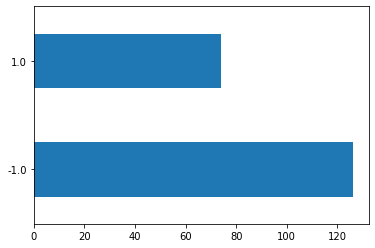

In [9]:
plt.figure()
f['Y'].value_counts().plot(kind='barh')
plt.show()

* scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
f_train_x = f_train.drop('Y', axis=1)

In [12]:
f_sc = scaler.fit(f_train_x)
f_ct = f_sc.transform(f_train_x)

In [13]:
f_ct = pd.DataFrame(f_ct) ; f_ct.head()

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
0,-0.222741,-1.782232,-0.218808,-0.758912,-0.243227,0.012353,-0.565079,0.101074,-0.570967,1.251048,...,-0.732678,-1.408547,1.607782,-0.159958,-0.202170,-0.160279,1.491114,-0.783264,-0.619599,-0.949519
1,0.552569,-0.644118,-0.653921,-1.086025,-0.841902,0.191508,-0.416178,1.586973,-0.742805,-1.058643,...,0.970573,2.746835,1.634578,0.055341,0.076301,0.043967,-1.205312,0.087110,0.708322,1.188044
2,0.478453,-0.084147,0.177724,-1.080798,-0.286032,0.608635,-0.614713,0.988178,-2.249697,-0.023985,...,-0.033365,0.031330,-1.500596,-0.159958,-0.118629,-0.150997,-0.171344,-0.295855,-0.541486,-0.384787
3,-0.689835,1.433586,-0.403113,-0.630845,0.152643,0.439367,-0.813247,-0.732170,0.255180,-0.055339,...,1.621817,-0.340415,-0.080389,-0.123570,-0.118629,-0.120736,1.551936,1.270819,1.216056,-0.400063
4,-0.764365,-1.362658,-0.809084,-0.248146,0.319729,0.426696,-0.862881,2.580213,-1.403723,0.153683,...,-1.784686,-1.609037,-0.991466,-0.053825,-0.035087,-0.051340,0.467283,-1.421539,-1.439785,-1.052653


In [14]:
f_ct.columns = f_train_x.columns

In [15]:
f_ct

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
0,-0.222741,-1.782232,-0.218808,-0.758912,-0.243227,0.012353,-0.565079,0.101074,-0.570967,1.251048,...,-0.732678,-1.408547,1.607782,-0.159958,-0.202170,-0.160279,1.491114,-0.783264,-0.619599,-0.949519
1,0.552569,-0.644118,-0.653921,-1.086025,-0.841902,0.191508,-0.416178,1.586973,-0.742805,-1.058643,...,0.970573,2.746835,1.634578,0.055341,0.076301,0.043967,-1.205312,0.087110,0.708322,1.188044
2,0.478453,-0.084147,0.177724,-1.080798,-0.286032,0.608635,-0.614713,0.988178,-2.249697,-0.023985,...,-0.033365,0.031330,-1.500596,-0.159958,-0.118629,-0.150997,-0.171344,-0.295855,-0.541486,-0.384787
3,-0.689835,1.433586,-0.403113,-0.630845,0.152643,0.439367,-0.813247,-0.732170,0.255180,-0.055339,...,1.621817,-0.340415,-0.080389,-0.123570,-0.118629,-0.120736,1.551936,1.270819,1.216056,-0.400063
4,-0.764365,-1.362658,-0.809084,-0.248146,0.319729,0.426696,-0.862881,2.580213,-1.403723,0.153683,...,-1.784686,-1.609037,-0.991466,-0.053825,-0.035087,-0.051340,0.467283,-1.421539,-1.439785,-1.052653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.059852,0.910457,0.809052,-0.980277,-0.052525,-0.005275,-1.557752,1.284407,-0.313209,-0.943681,...,-0.033365,0.031330,0.616316,-0.014404,-0.062934,-0.018504,-1.448598,-0.086965,0.161531,1.924404
196,0.348336,0.697995,-0.548428,0.312195,0.174193,-1.178679,0.973564,0.234140,1.246556,-0.525638,...,-0.033365,0.031330,0.026796,-0.156926,-0.104705,-0.152553,0.138687,-0.136297,-0.118374,-0.189549
197,-0.083221,-0.194549,-0.403113,-0.630845,0.152643,0.439367,-0.813247,-0.318716,-0.504875,-0.473382,...,-1.183538,1.580179,-1.232633,-0.150861,-0.118629,-0.144086,-1.438461,-0.876104,-0.971107,0.587906
198,-0.412869,-0.226785,-0.403113,-0.486551,-0.130754,-0.325542,-0.614713,-0.595936,-0.709759,1.679543,...,0.419522,-0.322662,-0.616316,0.031082,-0.062934,0.028225,0.082080,-0.063755,0.278701,-0.390931


* test도 동일하게 적용

In [16]:
f_test = f_test.drop('Y', axis=1)

In [17]:
f_test.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X465', 'X466', 'X467', 'X468', 'X469', 'X470', 'X471', 'X472', 'X473',
       'X474'],
      dtype='object', length=474)

In [18]:
f_test_x = f_sc.transform(f_test)

In [19]:
f_test_x = pd.DataFrame(f_test_x)

In [20]:
f_test_x.columns = f_test.columns

In [21]:
f_test_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
0,1.121987,-1.394895,-1.133369,1.556630,0.235891,-0.731224,2.661108,-0.345646,-0.425565,-0.828719,...,0.068852,-1.181537,1.098651,0.276705,0.159842,0.256549,1.501251,-0.353880,0.005305,-0.832743
1,-0.071606,0.423174,0.663741,-0.365525,0.253898,1.228450,-0.217644,1.246389,1.504314,0.289547,...,0.469617,0.079741,1.768560,0.049276,-0.007240,0.038453,-0.181481,0.075505,0.317757,-0.183932
2,0.439045,-0.557739,0.100142,0.992816,-0.082340,-0.846631,-0.217644,-1.983620,1.002017,-0.525638,...,-0.033365,0.031330,-0.241167,0.094762,0.131995,0.090464,2.423712,-0.504744,-0.307147,-0.961205
3,-0.022795,-1.483390,0.784012,0.597872,-0.385811,2.287643,-0.565079,-0.659300,-0.993954,2.578336,...,2.072677,1.061643,1.205836,-0.147829,-0.104705,-0.146632,0.061806,1.444894,1.567565,0.321167
4,0.851935,-0.642127,2.016703,0.395509,0.562682,1.251648,-0.962148,0.004443,0.050296,-0.755562,...,-0.033365,0.031330,0.053593,-0.263060,-0.285711,-0.254931,0.882898,2.141193,1.762847,0.092565


* 상관계수가 높은 변수 제거

In [22]:
f_co = f_ct.corr() ; f_co.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
X1,1.000000,-0.072391,0.056348,0.015248,0.067053,-0.084088,0.079297,-0.046107,0.009670,-0.064281,...,0.018929,0.061825,-0.001336,0.019928,0.015954,0.020103,-0.047238,-0.040646,-0.070528,0.002301
X2,-0.072391,1.000000,-0.046088,0.011067,0.044652,-0.003627,0.044270,0.033764,0.126387,0.052518,...,0.145759,0.088382,-0.020653,-0.009383,-0.013382,-0.009047,0.038449,0.121638,0.120720,0.057089
X3,0.056348,-0.046088,1.000000,0.282616,0.123182,-0.035131,-0.443815,0.094360,0.062611,-0.089606,...,-0.198175,-0.121097,-0.119172,0.079298,0.078601,0.079811,-0.045713,-0.194137,-0.210842,-0.086307
X4,0.015248,0.011067,0.282616,1.000000,0.348462,-0.532578,0.472840,-0.121617,0.050697,0.037812,...,-0.034734,-0.031963,0.010703,0.009418,0.007115,0.009243,0.037174,-0.023994,-0.025060,-0.036730
X5,0.067053,0.044652,0.123182,0.348462,1.000000,-0.181487,0.067298,0.061236,-0.018224,0.047385,...,-0.021699,-0.001415,-0.011557,0.025346,0.023081,0.026243,0.030712,-0.013645,-0.037032,-0.016316


In [23]:
f_co_true = abs(f_co) > 0.5 ; f_co_true.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
X1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
X2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
X3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
X4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
X5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
co_index = []
for i in f_co_true.index:
    du = f_co_true[f_co_true[i] == True].index
    du = list(du)
    du = list(du[1:])
    co_index.append(du)

In [25]:
re_co_index = []
for i in co_index:
    for j in i:
        re_co_index.append(j)

In [26]:
from collections import Counter

In [27]:
cnt = Counter(re_co_index)

In [28]:
cnt = dict(cnt) ; cnt

{'X6': 2,
 'X335': 8,
 'X134': 3,
 'X233': 3,
 'X132': 4,
 'X231': 5,
 'X334': 4,
 'X16': 8,
 'X140': 8,
 'X145': 8,
 'X239': 8,
 'X244': 8,
 'X342': 8,
 'X347': 8,
 'X17': 3,
 'X246': 6,
 'X142': 3,
 'X143': 4,
 'X241': 3,
 'X242': 4,
 'X345': 4,
 'X147': 4,
 'X349': 4,
 'X21': 16,
 'X25': 22,
 'X151': 20,
 'X152': 19,
 'X155': 20,
 'X156': 20,
 'X157': 20,
 'X250': 20,
 'X251': 19,
 'X254': 20,
 'X255': 20,
 'X256': 20,
 'X351': 20,
 'X352': 20,
 'X355': 20,
 'X356': 20,
 'X357': 20,
 'X24': 18,
 'X26': 21,
 'X161': 7,
 'X260': 8,
 'X361': 8,
 'X29': 3,
 'X169': 11,
 'X268': 12,
 'X369': 11,
 'X28': 1,
 'X32': 6,
 'X33': 6,
 'X34': 7,
 'X35': 6,
 'X38': 6,
 'X183': 34,
 'X190': 33,
 'X390': 33,
 'X37': 5,
 'X367': 7,
 'X40': 2,
 'X51': 6,
 'X56': 6,
 'X272': 8,
 'X373': 8,
 'X44': 9,
 'X46': 4,
 'X47': 7,
 'X57': 7,
 'X58': 7,
 'X62': 10,
 'X65': 10,
 'X67': 10,
 'X48': 4,
 'X177': 4,
 'X276': 4,
 'X45': 1,
 'X50': 3,
 'X53': 2,
 'X49': 1,
 'X275': 9,
 'X370': 5,
 'X176': 7,
 'X376':

* 3번 이상 중복되어 상관계수가 높다고 나온 변수를 추출

In [29]:
index = [ k for k, v in cnt.items() if v >= 3 ] 

In [30]:
index

['X335',
 'X134',
 'X233',
 'X132',
 'X231',
 'X334',
 'X16',
 'X140',
 'X145',
 'X239',
 'X244',
 'X342',
 'X347',
 'X17',
 'X246',
 'X142',
 'X143',
 'X241',
 'X242',
 'X345',
 'X147',
 'X349',
 'X21',
 'X25',
 'X151',
 'X152',
 'X155',
 'X156',
 'X157',
 'X250',
 'X251',
 'X254',
 'X255',
 'X256',
 'X351',
 'X352',
 'X355',
 'X356',
 'X357',
 'X24',
 'X26',
 'X161',
 'X260',
 'X361',
 'X29',
 'X169',
 'X268',
 'X369',
 'X32',
 'X33',
 'X34',
 'X35',
 'X38',
 'X183',
 'X190',
 'X390',
 'X37',
 'X367',
 'X51',
 'X56',
 'X272',
 'X373',
 'X44',
 'X46',
 'X47',
 'X57',
 'X58',
 'X62',
 'X65',
 'X67',
 'X48',
 'X177',
 'X276',
 'X50',
 'X275',
 'X370',
 'X176',
 'X376',
 'X60',
 'X59',
 'X64',
 'X181',
 'X280',
 'X381',
 'X383',
 'X61',
 'X179',
 'X180',
 'X182',
 'X184',
 'X185',
 'X186',
 'X187',
 'X188',
 'X278',
 'X279',
 'X281',
 'X282',
 'X283',
 'X284',
 'X285',
 'X286',
 'X287',
 'X289',
 'X380',
 'X382',
 'X385',
 'X386',
 'X387',
 'X388',
 'X63',
 'X391',
 'X292',
 'X193',
 'X2

In [31]:
len(index)

284

In [32]:
f_train_x = f_train_x.drop(index, axis=1) ; f_train_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X448,X449,X450,X455,X456,X457,X463,X464,X467,X468
0,0.362875,0.149808,0.327559,0.127193,0.152837,0.455522,0.439655,0.528472,0.313968,0.652529,...,0.625858,0.378014,0.378808,0.950539,0.978810,0.012170,0.600000,0.130350,0.916667,0.008319
1,0.491878,0.324355,0.260787,0.056136,0.095150,0.475578,0.465517,0.811088,0.281829,0.292007,...,0.417500,0.294326,0.457817,0.914290,0.803042,0.018461,0.149153,0.276265,0.920139,0.023464
2,0.479546,0.410235,0.388409,0.057271,0.148712,0.522274,0.431034,0.697198,0.000000,0.453507,...,0.079459,0.177305,0.111316,0.921512,0.802179,0.005649,0.376518,0.245709,0.513889,0.008319
3,0.285156,0.643003,0.299276,0.155012,0.190982,0.503325,0.396552,0.369991,0.468480,0.448613,...,0.321249,0.388297,0.202728,0.931145,0.881427,0.016142,0.610169,0.474708,0.697917,0.010879
4,0.272754,0.214156,0.236976,0.238144,0.207082,0.501906,0.387931,1.000000,0.158220,0.481240,...,0.236610,0.121277,0.200870,0.934249,0.846220,0.010884,0.428814,0.023346,0.579861,0.015785


In [33]:
f_test_x = f_test_x.drop(index, axis=1)

In [34]:
f_test_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X448,X449,X450,X455,X456,X457,X463,X464,X467,X468
0,1.121987,-1.394895,-1.133369,1.556630,0.235891,-0.731224,2.661108,-0.345646,-0.425565,-0.828719,...,-0.177377,-0.036621,-0.095727,0.324785,0.989345,-0.239421,1.923277,-0.373175,1.098651,0.276705
1,-0.071606,0.423174,0.663741,-0.365525,0.253898,1.228450,-0.217644,1.246389,1.504314,0.289547,...,-0.110799,0.454142,0.795104,0.287559,-0.502103,-0.202819,-0.521222,0.147050,1.768560,0.049276
2,0.439045,-0.557739,0.100142,0.992816,-0.082340,-0.846631,-0.217644,-1.983620,1.002017,-0.525638,...,-0.177377,-0.036621,-0.095727,0.171232,-2.281856,-0.219165,-0.033123,-0.059711,-0.241167,0.094762
3,-0.022795,-1.483390,0.784012,0.597872,-0.385811,2.287643,-0.565079,-0.659300,-0.993954,2.578336,...,-1.285301,-1.606608,0.034570,0.166097,0.263363,-0.231722,-0.167800,1.806145,1.205836,-0.147829
4,0.851935,-0.642127,2.016703,0.395509,0.562682,1.251648,-0.962148,0.004443,0.050296,-0.755562,...,0.431367,0.250191,0.851169,-0.031897,0.501011,-0.265126,-0.033123,-0.059711,0.053593,-0.263060


## PCA

* 여전히 변수가 많기에 PCA로 추가적으로 제거할 변수를 찾아본다.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=190)
pca_array = pca.fit_transform(f_train_x)
pca_df = pd.DataFrame(pca_array, index=f_train_x.index,
                      columns=[f"pca{num+1}" for num in range(f_train_x.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca181,pca182,pca183,pca184,pca185,pca186,pca187,pca188,pca189,pca190
0,0.806373,-0.130586,-0.082321,-0.123766,0.080524,0.176393,-0.629445,-0.110851,-0.098238,0.118852,...,-0.001429,0.002232,0.000935,0.000127,6.063452e-17,-3.146693e-17,-6.840466e-18,-8.929224e-17,-1.304627e-18,-1.627693e-18
1,-0.748830,0.249675,0.002653,-0.452279,0.077362,-0.355212,0.205190,0.006759,-0.051949,-0.139700,...,-0.000822,0.001270,-0.001849,0.001195,8.174345e-17,-9.198779e-18,1.031199e-17,-3.501666e-17,2.557429e-17,3.954282e-17
2,-0.271490,-0.185948,0.720927,-0.143325,0.189285,0.403750,0.088597,0.223624,-0.262088,0.264592,...,0.005041,0.001585,-0.000557,-0.000407,-9.536472e-18,2.624301e-17,-2.524001e-17,-3.938927e-17,1.129048e-18,-3.623920e-17
3,0.748109,0.329671,-0.038175,-0.024688,0.254911,0.525769,-0.093843,-0.469851,-0.132558,-0.401040,...,0.002166,-0.002332,-0.000797,0.001294,8.340595e-17,3.272392e-17,-2.608476e-18,3.653996e-17,5.294041e-17,3.184137e-17
4,-0.057228,-0.451432,0.408507,-0.627118,0.220719,0.499528,-0.029489,-0.292003,-0.115980,-0.389192,...,-0.001846,0.001141,-0.000571,-0.000179,4.105810e-17,-1.246956e-17,3.878089e-17,-7.413897e-18,1.122641e-17,-7.200659e-17


* 특정 고윳값/모든 고윳값의 합으로 주성분 갯수를 찾는다.

In [36]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(f_train_x.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.267306e-01,4.573295e-02,0.045733
pca2,1.953934e-01,3.941203e-02,0.085145
pca3,1.648963e-01,3.326059e-02,0.118406
pca4,1.528832e-01,3.083748e-02,0.149243
pca5,1.376418e-01,2.776319e-02,0.177006
...,...,...,...
pca186,1.008176e-33,2.033552e-34,1.000000
pca187,1.008176e-33,2.033552e-34,1.000000
pca188,1.008176e-33,2.033552e-34,1.000000
pca189,1.008176e-33,2.033552e-34,1.000000


In [37]:
result.head(100)

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.226731,0.045733,0.045733
pca2,0.195393,0.039412,0.085145
pca3,0.164896,0.033261,0.118406
pca4,0.152883,0.030837,0.149243
pca5,0.137642,0.027763,0.177006
...,...,...,...
pca96,0.008222,0.001658,0.960740
pca97,0.008092,0.001632,0.962372
pca98,0.007742,0.001562,0.963934
pca99,0.007572,0.001527,0.965462


* 100개를 사용해도 약 97%를 설명한다는 것을 위에서 확인 : 100개만 남긴다.

In [38]:
len(pca_array[0][:100])

100

In [39]:
pca_array

array([[ 8.06372560e-01, -1.30586266e-01, -8.23207601e-02, ...,
        -8.92922410e-17, -1.30462655e-18, -1.62769255e-18],
       [-7.48829560e-01,  2.49674819e-01,  2.65342127e-03, ...,
        -3.50166635e-17,  2.55742854e-17,  3.95428177e-17],
       [-2.71489740e-01, -1.85947838e-01,  7.20926796e-01, ...,
        -3.93892682e-17,  1.12904844e-18, -3.62391972e-17],
       ...,
       [ 3.72000312e-01,  4.27162915e-01,  2.08793758e-01, ...,
        -1.19599484e-17,  1.82874942e-17, -6.63823338e-17],
       [ 4.13537662e-01,  6.41410083e-01, -3.56461052e-01, ...,
         4.20234660e-17,  1.47557466e-17,  4.53950442e-18],
       [ 4.04826983e-01, -2.79288705e-01, -4.32391601e-01, ...,
        -2.69304677e-17,  5.38699965e-17,  2.04869212e-18]])

In [40]:
re_pca =[]
for i in pca_array:
    pca_num = i[:100]
    re_pca.append(pca_num)

In [41]:
len(re_pca)

200

In [42]:
len(re_pca[0])

100

* test도 동일하게 적용

In [43]:
f_test_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X448,X449,X450,X455,X456,X457,X463,X464,X467,X468
0,1.121987,-1.394895,-1.133369,1.556630,0.235891,-0.731224,2.661108,-0.345646,-0.425565,-0.828719,...,-0.177377,-0.036621,-0.095727,0.324785,0.989345,-0.239421,1.923277,-0.373175,1.098651,0.276705
1,-0.071606,0.423174,0.663741,-0.365525,0.253898,1.228450,-0.217644,1.246389,1.504314,0.289547,...,-0.110799,0.454142,0.795104,0.287559,-0.502103,-0.202819,-0.521222,0.147050,1.768560,0.049276
2,0.439045,-0.557739,0.100142,0.992816,-0.082340,-0.846631,-0.217644,-1.983620,1.002017,-0.525638,...,-0.177377,-0.036621,-0.095727,0.171232,-2.281856,-0.219165,-0.033123,-0.059711,-0.241167,0.094762
3,-0.022795,-1.483390,0.784012,0.597872,-0.385811,2.287643,-0.565079,-0.659300,-0.993954,2.578336,...,-1.285301,-1.606608,0.034570,0.166097,0.263363,-0.231722,-0.167800,1.806145,1.205836,-0.147829
4,0.851935,-0.642127,2.016703,0.395509,0.562682,1.251648,-0.962148,0.004443,0.050296,-0.755562,...,0.431367,0.250191,0.851169,-0.031897,0.501011,-0.265126,-0.033123,-0.059711,0.053593,-0.263060


In [44]:
f_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
200,0.586623,0.209212,0.187212,0.630185,0.199004,0.372281,1.000000,0.443507,0.341162,0.327896,...,0.298507,0.105115,0.850694,0.039036,0.032227,0.037229,0.619741,0.202335,0.298507,0.088135
201,0.388022,0.488041,0.462992,0.212646,0.200739,0.591660,0.500000,0.746309,0.702101,0.502447,...,0.358209,0.252014,0.937500,0.023038,0.020508,0.021896,0.351133,0.274319,0.358209,0.211305
202,0.472989,0.337603,0.376504,0.507711,0.168340,0.359362,0.500000,0.131967,0.608158,0.375204,...,0.283280,0.246376,0.677083,0.026237,0.030273,0.025552,0.766990,0.177043,0.238806,0.063748
203,0.396144,0.195640,0.481449,0.421920,0.139098,0.710234,0.439655,0.383851,0.234858,0.859706,...,0.597015,0.366374,0.864583,0.009172,0.013672,0.008883,0.389968,0.503891,0.597015,0.307192
204,0.541690,0.324661,0.670614,0.377961,0.230493,0.594257,0.370690,0.510093,0.430161,0.339315,...,0.283280,0.246376,0.715278,0.001067,0.000977,0.001269,0.521036,0.620623,0.634328,0.263794


In [45]:
pca_array = pca.transform(f_test_x)

In [46]:
test_x =[]
for i in pca_array:
    pca_num = i[:100]
    test_x.append(pca_num)

In [47]:
len(test_x)

54

In [48]:
len(test_x[0])

100

# Modeling

### Decision Tree

In [49]:
train_y = f[:200]['Y']

In [50]:
train_x = re_pca

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,
                                                   test_size=0.2, random_state=42, stratify=train_y)

In [52]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [53]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
dt_preds = dt_clf.predict(X_test)

In [55]:
accuracy_score(y_test, dt_preds)

0.525

In [56]:
f1_score(y_test, dt_preds)

0.3448275862068965

In [57]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [5, 10, 15],
    'max_leaf_nodes': [2, 3, 4],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=cv)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
0.5670940170940171


In [58]:
dt_preds = grid_cv.predict(X_test)

In [59]:
f1_score(y_test, dt_preds)

0.4166666666666667

# K-Nearest Neighbors

In [60]:
neigh_clf = KNeighborsClassifier()

In [61]:
neigh_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
neigh_preds = neigh_clf.predict(X_test)

In [63]:
accuracy_score(y_test, neigh_preds)

0.625

In [64]:
f1_score(y_test, neigh_preds)

0.0

In [65]:
params = {
    'n_neighbors': [8, 10, 13, 15, 18, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 2, 3, 5, 10, 20],
    'p': [1, 2]
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(neigh_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
0.4099206349206349


In [66]:
neigh_preds = grid_cv.predict(X_test)

In [67]:
f1_score(y_test, neigh_preds)

0.23529411764705882

### Logistic Regression

In [68]:
lr_clf = LogisticRegression(random_state=42)

In [69]:
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
lr_clf_preds = lr_clf.predict(X_test)

In [71]:
accuracy_score(y_test, lr_clf_preds)

0.75

In [72]:
f1_score(y_test, lr_clf_preds)

0.6153846153846153

In [73]:
params = {
    'max_iter': [30, 50, 100, 200, 300]
}

cv = StratifiedKFold(n_splits=10, random_state=2022, shuffle=True)
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_iter': 30}
0.7338095238095238


In [74]:
y_preds = grid_cv.predict(X_test)
f1_score(y_test, y_preds)

0.6153846153846153

* 성능이 너무 좋지 않다.

# Re Modeling

### Decision Tree

In [75]:
f_train = f[:200].drop('Y', axis=1)

In [76]:
f_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
0,0.362875,0.149808,0.327559,0.127193,0.152837,0.455522,0.439655,0.528472,0.313968,0.652529,...,0.179104,0.078676,0.916667,0.008319,0.006836,0.007924,0.618123,0.130350,0.179104,0.065967
1,0.491878,0.324355,0.260787,0.056136,0.095150,0.475578,0.465517,0.811088,0.281829,0.292007,...,0.432836,0.562646,0.920139,0.023464,0.026367,0.022283,0.187702,0.276265,0.432836,0.471758
2,0.479546,0.410235,0.388409,0.057271,0.148712,0.522274,0.431034,0.697198,0.000000,0.453507,...,0.283280,0.246376,0.513889,0.008319,0.012695,0.008576,0.352751,0.212062,0.194030,0.173175
3,0.285156,0.643003,0.299276,0.155012,0.190982,0.503325,0.396552,0.369991,0.468480,0.448613,...,0.529851,0.203079,0.697917,0.010879,0.012695,0.010704,0.627832,0.474708,0.529851,0.170275
4,0.272754,0.214156,0.236976,0.238144,0.207082,0.501906,0.387931,1.000000,0.158220,0.481240,...,0.022388,0.055325,0.579861,0.015785,0.018555,0.015583,0.454693,0.023346,0.022388,0.046388


In [77]:
f_sc = scaler.fit(f_train)
train_x = f_sc.transform(f_train)

In [78]:
train_x

array([[-0.22274072, -1.78223202, -0.21880811, ..., -0.78326425,
        -0.61959867, -0.94951942],
       [ 0.55256904, -0.64411834, -0.65392065, ...,  0.08711001,
         0.708322  ,  1.18804383],
       [ 0.47845346, -0.08414749,  0.17772405, ..., -0.29585466,
        -0.54148569, -0.38478654],
       ...,
       [-0.08322092, -0.1945485 , -0.40311315, ..., -0.87610417,
        -0.97110709,  0.58790606],
       [-0.41286929, -0.22678509, -0.40311315, ..., -0.06375486,
         0.27870061, -0.39093107],
       [-0.8594986 ,  0.05687207, -1.13336939, ..., -0.3654846 ,
        -0.46337271, -0.66524573]])

In [79]:
f_test = f[200:].drop('Y', axis=1)

In [80]:
test_x = f_sc.transform(f_test)

In [81]:
test_x

array([[ 1.12198683, -1.394895  , -1.13336939, ..., -0.35387962,
         0.00530517, -0.83274346],
       [-0.07160579,  0.4231744 ,  0.6637414 , ...,  0.07550502,
         0.3177571 , -0.18393172],
       [ 0.43904499, -0.5577392 ,  0.10014216, ..., -0.50474448,
        -0.30714675, -0.96120512],
       ...,
       [-0.82257909, -0.93449665,  1.1374417 , ..., -0.29585466,
        -0.15092079, -0.80802758],
       [ 0.14825198,  0.64098925, -1.31110952, ..., -1.15462394,
        -1.20544604, -0.82472669],
       [-1.83060621,  0.72039832,  0.6637414 , ..., -0.59758441,
        -0.58054219, -0.57220786]])

In [82]:
train_y = f[:200]['Y']

In [83]:
train_y

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
      ... 
195   -1.0
196   -1.0
197   -1.0
198   -1.0
199   -1.0
Name: Y, Length: 200, dtype: float64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,
                                                   test_size=0.2, random_state=42, stratify=train_y)

In [85]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [86]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
dt_preds = dt_clf.predict(X_test)

In [88]:
accuracy_score(y_test, dt_preds)

0.7

In [89]:
f1_score(y_test, dt_preds)

0.6

In [90]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [5, 10, 15],
    'max_leaf_nodes': [2, 3, 4],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

cv = StratifiedKFold(n_splits=10, random_state=2022, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=cv)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.6147008547008548


In [91]:
dt_preds = grid_cv.predict(X_test)

In [92]:
f1_score(y_test, dt_preds)

0.5454545454545455

* 전체 train으로 학습 후 Test Set예측

In [93]:
dt = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3, max_leaf_nodes=3, min_impurity_decrease=0, 
                            min_samples_leaf=1, min_samples_split=5, splitter='random')

In [94]:
dt.fit(train_x, train_y)
y_preds = dt.predict(test_x)
dt_y_preds = pd.DataFrame(y_preds)

In [95]:
dt_y_preds

,0
0,-1.0
1,-1.0
2,-1.0
3,1.0
4,-1.0
5,1.0
6,-1.0
7,1.0
8,-1.0
9,-1.0


## K-Nearest Neighbors

In [96]:
neigh_clf = KNeighborsClassifier()

In [97]:
neigh_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
neigh_preds = neigh_clf.predict(X_test)

In [99]:
accuracy_score(y_test, neigh_preds)

0.675

In [100]:
params = {
    'n_neighbors': [8, 10, 13, 15, 18, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 2, 3, 5, 10, 20],
    'p': [1, 2]
}

cv = StratifiedKFold(n_splits=10, random_state=2022, shuffle=True)
grid_cv = GridSearchCV(neigh_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.6833333333333333


In [101]:
neigh_preds = grid_cv.predict(X_test)

In [102]:
f1_score(y_test, neigh_preds)

0.608695652173913

* 전체 Train Set으로 학습 후 Test Set예측

In [103]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=8, p=1,
                          weights='distance')
knn.fit(train_x, train_y)
y_preds = knn.predict(test_x)
knn_y_preds = pd.DataFrame(y_preds)

In [104]:
knn_y_preds

,0
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
5,1.0
6,-1.0
7,-1.0
8,-1.0
9,-1.0


## Logistic Regression

In [105]:
lr_clf = LogisticRegression(random_state=42)

In [106]:
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [107]:
lr_clf_preds = lr_clf.predict(X_test)

In [108]:
accuracy_score(y_test, lr_clf_preds)

0.8

In [109]:
f1_score(y_test, lr_clf_preds)

0.7333333333333333

In [110]:
params = {
    'max_iter': [30, 50, 100, 200, 300]
}

cv = StratifiedKFold(n_splits=10, random_state=2022, shuffle=True)
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='f1', cv=cv, n_jobs=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_iter': 30}
0.7437445887445887


In [111]:
y_preds = grid_cv.predict(X_test)
f1_score(y_test, y_preds)

0.7333333333333333

* 전체 Train Set으로 학습 후 Test Set예측

In [112]:
lr = LogisticRegression(random_state=42, max_iter=30)
lr.fit(train_x, train_y)
y_preds = lr.predict(test_x)
lr_y_preds = pd.DataFrame(y_preds)

In [113]:
lr_y_preds

,0
0,1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
5,1.0
6,-1.0
7,-1.0
8,1.0
9,-1.0


In [114]:
lr_y_preds.columns = ['Y']

In [115]:
lr_y_preds.head()

,Y
0,1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0


In [116]:
lr_y_preds

,Y
0,1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
5,1.0
6,-1.0
7,-1.0
8,1.0
9,-1.0


In [117]:
f[200:]['Y'] = np.array(lr_y_preds)

In [118]:
f

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.362875,0.149808,0.327559,0.127193,0.152837,0.455522,0.439655,0.528472,0.313968,0.652529,...,0.078676,0.916667,0.008319,0.006836,0.007924,0.618123,0.130350,0.179104,0.065967,-1.0
1,0.491878,0.324355,0.260787,0.056136,0.095150,0.475578,0.465517,0.811088,0.281829,0.292007,...,0.562646,0.920139,0.023464,0.026367,0.022283,0.187702,0.276265,0.432836,0.471758,-1.0
2,0.479546,0.410235,0.388409,0.057271,0.148712,0.522274,0.431034,0.697198,0.000000,0.453507,...,0.246376,0.513889,0.008319,0.012695,0.008576,0.352751,0.212062,0.194030,0.173175,-1.0
3,0.285156,0.643003,0.299276,0.155012,0.190982,0.503325,0.396552,0.369991,0.468480,0.448613,...,0.203079,0.697917,0.010879,0.012695,0.010704,0.627832,0.474708,0.529851,0.170275,-1.0
4,0.272754,0.214156,0.236976,0.238144,0.207082,0.501906,0.387931,1.000000,0.158220,0.481240,...,0.055325,0.579861,0.015785,0.018555,0.015583,0.454693,0.023346,0.022388,0.046388,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.369248,0.345162,0.299276,0.155012,0.190982,0.503325,0.396552,0.550166,0.341162,0.440457,...,0.483769,0.680556,0.052901,0.042969,0.051062,0.208738,0.276265,0.343284,0.405624,-1.0
250,0.381948,0.425659,0.355464,0.066679,0.024577,0.396461,0.362069,0.531787,0.438813,0.476346,...,0.246376,0.399306,0.008106,0.007812,0.008483,0.525890,0.379377,0.410448,0.171586,1.0
251,0.263068,0.279821,0.535685,0.302794,0.242326,0.408966,0.646552,0.638747,0.660074,0.520392,...,0.110711,0.517361,0.023677,0.022461,0.023447,0.608414,0.212062,0.268657,0.092827,1.0
252,0.424604,0.521446,0.159937,0.253346,0.195249,0.448560,0.715517,0.279000,0.402967,0.584013,...,0.246376,0.677083,0.009386,0.013672,0.009357,0.349515,0.068093,0.067164,0.089657,1.0


In [119]:
f.to_csv('classification.csv', index=False)